When we take data in an experiment, even if we are measure the SAME quantity, over and over again, we do not necessarily expect to get exactly the same result every single time, nor do we necessary expect to always get
a value that agrees with the accepted theoretical value.  There are two principle reasons why:

1. Statistical Uncertainty

There is some "randomness" to the measurement that we are making, and this randomness is related to various factors in the experiment that may be beyond our control - think about things like ambient temperature dependence, wind direction, time of day, etc.  

The result is that we will sometimes measure a value a bit higher than the true value, and sometimes we will measure a value that is a bit lower.  Thus, there is a DISTRIBUTION of measured values surrounding the mean value.

2. Systematic Uncertainty

Sometimes, in an experiment, the measurements that we make will differ from the true value because of an effect
that tends to give us a measured value that is either always greater or always smaller than the true value.  For example, suppose that we were measuring the time that it takes for an object to fall from the top of a building of known height to the ground.  Because of air resistance, the times that we would measure would always be greater than that predicted by a theory which did not include air resistance.  If, in turn, we used these date to measure
a value of g, the acceleration due to gravity, we would measure a value that was systematically smaller than the accepted value (9.8 m/s^2).

Let us begin to understand the details of uncertainty in experiments:

a) Uncertainties in the raw quantities - $\delta{x}$, $\delta{y}$, etc.  In every experiment, we will make measurements of a few physical quantities (position, time, velocity, etc.), and each of these measurements will
have an uncertainty associated with it.

b) Uncertainties in calculated quantities - the fundamental question is, then, given a set of measurements of raw
quantities, each with an uncertainty, what is the uncertainty in some calculated quantity?

Example:  We drop an object from the top of a building to the ground below.  We carry out this experiment 1000 times.  Thus, we have data for 1000 measurements of the time that it took for the object to fall from the building of known height

(i) From our distance measurements, we estimate the height of the building to be $h = 30.0 \pm 0.1 m$.

(ii) From our time measurements, we estimate the mean time to be $t = 2.51 \pm 0.04 s$

# Method 1:  Brute Force Method

Ignoring air resistance, the expected theoretical desription is:

$h = \frac{1}{2} g t^2$

We can rearrange this to get:

$g = \frac{2h}{t^2}$

We can use the range of values of $h$ and $t$ to calculate the maximum and minimum values of $g$ that we might expect:

In [44]:
h = 30.0
dh = 0.1
t = 2.51
dt = 0.04

h_max = h + dh
h_min = h - dh
t_max = t + dt
t_min = t - dt

g_max = 2.0*h_max/t_min**2
g_min = 2.0*h_min/t_max**2

g = (g_max+g_min)/2.0
dg = (g_max-g_min)/2.0

print ("g = %.3f +/- %.3f" % (g,dg))

g = 9.532 +/- 0.335


The big problem with the brute force method is that it ONLY works if we can easily determine which combination of maximum and minimum values of the raw quanties lead to the maximum/minimum value of the derived quantity.  Here, it was easy, but in general it can be quite hard!  Moreover, the brute force method assumes that the maximum and minimum values of the derived quantity will occur at some combination of the ENDPOINTS of the intervals for the raw quantities, and this is definitely not always the case.

# Method 2: Calculus

If the uncertainties in the raw quantities represent $uniform$ distributions around the mean, then we can use
the chain rule of differentiation to show that:

$\delta{g} = \left ( \left | \frac{\partial{g}}{\partial{h}} \right | \delta h + \left | \frac{\partial{g}}{\partial{t}} \right | \delta t \right ) $

$\frac{\partial{g}}{\partial{h}} = \frac{2}{t^2}$

$\frac{\partial{g}}{\partial{t}} = \frac{-4h}{t^3}$



In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

dgdh = np.abs(2.0/t**2)
dgdt = np.abs(-4.0*h/t**3)
dg = dgdh*dh + dgdt*dt
g = 2.0*h/t**2

print ("g = %.3f +/- %.3f" % (g,dg))

g = 9.524 +/- 0.335


The calculus method has the advantage that we can break down the uncertainty into components:  one coming from the uncertainty in the distance, and one coming from the uncertainty in the time.  This is really a crucial concept in experiment design!!!  If we want to make a better experiment, this will tell us where we should focus our efforts.

In [46]:
dg_height = dgdh*dh
dg_time = dgdt*dt

print ("g = %.3f +/- %.3f (height) +/- %.3f (time)" % (g,dg_height,dg_time))

g = 9.524 +/- 0.032 (height) +/- 0.304 (time)


As one can see, almost all of the uncertainty comes from measuring the TIME, and not from measuring the distance!

If the uncertainties in the raw quantities represent $Gaussian$ distributions around the mean, then we can use
the chain rule of differentiation to show that:

$(\delta{g})^2 = \left ( \left ( \frac{\partial{g}}{\partial{h}} \right )^2 (\delta h)^2 + \left ( \frac{\partial{g}}{\partial{t}} \right )^2 (\delta t)^2 \right ) $

$\frac{\partial{g}}{\partial{h}} = \frac{2}{t^2}$

$\frac{\partial{g}}{\partial{t}} = \frac{-4h}{t^3}$



In [47]:
dg = np.sqrt((dgdh*dh)**2 + (dgdt*dt)**2)
g = 2.0*h/t**2

print ("g = %.3f +/- %.3f" % (g,dg))

g = 9.524 +/- 0.305


Note that with Gaussian uncertainties, the uncertainty in the derived quantity is SMALLER than with uniform uncertainties.  This is because the values of the raw quantities are peaked more towards the mean value (i.e. closer to the truth).

# Method 3: Simulation

Another option, and one which works well in complicated experimental situations, is to SIMULATE the experiment.
For this experiment, here are the steps that we need to follow:

1. Choose the height, randomly, as a number between (h-dh) and (h+dh).
2. Choose the time, randomly, as a number between (t-dt) and (t+dt).
3. Calculate the value of g based on these randomly chosen values of h and t.
4. Do the experiment N times, where N is some large number, so that we get a full picture of the distributions.
5. Use fitting or statistical software to determine the uncertainty in g, based on the distribution of calculated values.

g = 9.525 +/- 0.334


(array([ 24.,  93., 136., 165., 251., 239., 252., 226., 235., 233., 236.,
        216., 229., 217., 233., 231., 202., 211., 209., 239., 229., 220.,
        230., 195., 207., 203., 225., 190., 205., 229., 231., 204., 228.,
        200., 194., 210., 228., 242., 195., 218., 199., 214., 213., 213.,
        220., 224., 147., 132.,  55.,  23.]),
 array([9.19837774, 9.21172332, 9.22506891, 9.23841449, 9.25176007,
        9.26510566, 9.27845124, 9.29179683, 9.30514241, 9.31848799,
        9.33183358, 9.34517916, 9.35852475, 9.37187033, 9.38521591,
        9.3985615 , 9.41190708, 9.42525266, 9.43859825, 9.45194383,
        9.46528942, 9.478635  , 9.49198058, 9.50532617, 9.51867175,
        9.53201734, 9.54536292, 9.5587085 , 9.57205409, 9.58539967,
        9.59874526, 9.61209084, 9.62543642, 9.63878201, 9.65212759,
        9.66547318, 9.67881876, 9.69216434, 9.70550993, 9.71885551,
        9.7322011 , 9.74554668, 9.75889226, 9.77223785, 9.78558343,
        9.79892902, 9.8122746 , 9.82562018, 9.

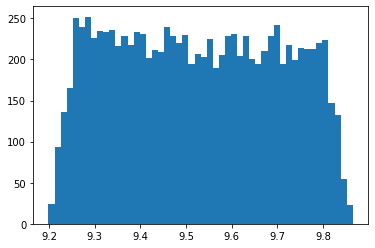

In [48]:
# uniform uncertainties
npts = 10000

hdata = h - dh + 2.0*dh*np.random.random(npts)
tdata = t - dt + 2.0*dt*np.random.random(npts)

g = 2.0*hdata/tdata**2

dg = np.ptp(g)/2.0
gmean = np.mean(g)

print ("g = %.3f +/- %.3f" % (gmean,dg))

plt.hist(g,50)

g = 9.533 +/- 0.304


(array([  4.,   7.,  11.,  14.,  13.,  37.,  38.,  78.,  81., 132., 158.,
        212., 268., 333., 384., 448., 513., 567., 596., 580., 617., 608.,
        587., 586., 494., 448., 400., 320., 306., 256., 233., 164., 139.,
        109.,  76.,  48.,  41.,  31.,  19.,  10.,   8.,   8.,   4.,   5.,
          4.,   0.,   2.,   1.,   0.,   2.]),
 array([ 8.55494419,  8.60146517,  8.64798616,  8.69450714,  8.74102812,
         8.78754911,  8.83407009,  8.88059107,  8.92711205,  8.97363304,
         9.02015402,  9.066675  ,  9.11319599,  9.15971697,  9.20623795,
         9.25275893,  9.29927992,  9.3458009 ,  9.39232188,  9.43884287,
         9.48536385,  9.53188483,  9.57840581,  9.6249268 ,  9.67144778,
         9.71796876,  9.76448975,  9.81101073,  9.85753171,  9.90405269,
         9.95057368,  9.99709466, 10.04361564, 10.09013663, 10.13665761,
        10.18317859, 10.22969957, 10.27622056, 10.32274154, 10.36926252,
        10.41578351, 10.46230449, 10.50882547, 10.55534645, 10.60186744,
 

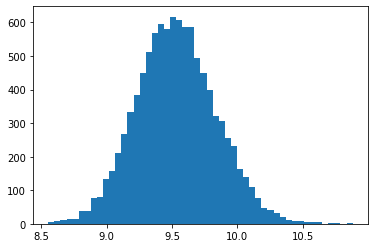

In [49]:
# Gaussian uncertainties

npts = 10000

hdata = h + dh*np.random.randn(npts)
tdata = t + dt*np.random.randn(npts)

g = 2.0*hdata/tdata**2

dg = np.std(g,ddof=1)
gmean = np.mean(g)

print ("g = %.3f +/- %.3f" % (gmean,dg))

plt.hist(g,50)

# Comparison of Calculus and Simulation methods for a complex function

In [64]:
def mycomplexfunction(h,t):
    return np.tan(np.exp(t**2)*np.log(abs(np.cos(h))))
                  
def dfdh(h,t):
    return -np.exp(t**2)*np.tan(h)*(1./np.cos(np.exp(t**2)*np.log(np.cos(h))))**2

def dfdt(h,t):
    return 2*np.exp(t**2)*t*np.log(np.cos(h))*(1./np.cos(np.exp(t**2)*np.log(np.cos(h))))**2

In [70]:
f = mycomplexfunction(h,t)
print (h,t,f)

30.0 2.51 -0.12455309574875552


In [66]:
df = np.sqrt((dfdh(h,t)*dh)**2 + (dfdt(h,t)*dt)**2)
print (df)

410.60215070465006


g = 26.172 +/- 8444.578


(array([2.3000e+01, 3.7000e+01, 4.0000e+01, 3.6000e+01, 3.4000e+01,
        4.6000e+01, 6.7000e+01, 5.9000e+01, 6.3000e+01, 6.9000e+01,
        8.5000e+01, 9.4000e+01, 1.0500e+02, 1.4500e+02, 1.3300e+02,
        1.6500e+02, 2.4400e+02, 3.2700e+02, 4.5900e+02, 5.8900e+02,
        9.9100e+02, 1.6800e+03, 4.0050e+03, 1.4796e+04, 5.0297e+04,
        1.4705e+04, 3.9050e+03, 1.7680e+03, 9.6900e+02, 6.3900e+02,
        4.2300e+02, 3.0700e+02, 2.3600e+02, 2.2400e+02, 1.6200e+02,
        1.2900e+02, 9.4000e+01, 6.9000e+01, 9.0000e+01, 6.3000e+01,
        5.9000e+01, 5.6000e+01, 4.8000e+01, 4.4000e+01, 4.6000e+01,
        2.9000e+01, 2.6000e+01, 3.6000e+01, 2.1000e+01]),
 array([-50.        , -47.95918367, -45.91836735, -43.87755102,
        -41.83673469, -39.79591837, -37.75510204, -35.71428571,
        -33.67346939, -31.63265306, -29.59183673, -27.55102041,
        -25.51020408, -23.46938776, -21.42857143, -19.3877551 ,
        -17.34693878, -15.30612245, -13.26530612, -11.2244898 ,
         -

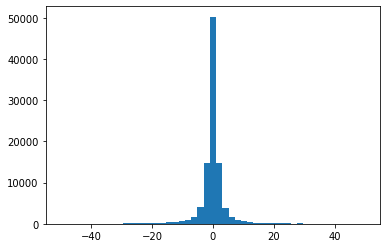

In [84]:
# Gaussian uncertainties

npts = 100000

hdata = h + dh*np.random.randn(npts)
tdata = t + dt*np.random.randn(npts)

#print (hdata,tdata)

g = mycomplexfunction(hdata,tdata)

#print (g)

dg = np.std(g,ddof=1)
gmean = np.mean(g)

print ("g = %.3f +/- %.3f" % (gmean,dg))

binlist = np.linspace(-50,50,50)

plt.hist(g,bins=binlist)